**<h1>Mathematical Modeling - Fourier Series</h1>**
<h3>Presentation by Asimakis Kydros, 3881</h3>

The libraries used are listed below:

In [40]:
# Always run this cell
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from scipy.integrate import quad

The Fourier series is a way to approximate any given and adequate function as a linear combination of a series of sines and cosines.

In the general case, the Fourier series of $f$ is written and calculated as

\begin{align}
    f(x) \text{ ~ } \frac{a_0}{2} + \sum_{n=1}^∞a_ncos(\frac{n\pi x}{p}) + b_nsin(\frac{n\pi x}{p}) 
\end{align}

where $f$ is $2p$-periodic and integrable in the range $[-p, p]$.
Then, the constants $a_0, a_n, b_n, n \geq 1$ are defined as

\begin{align}
    a_n &= \frac{1}{p}\int_{-p}^{p}f(x)cos(\frac{n\pi x}{p})dx, n \geq 0\\
    b_n &= \frac{1}{p}\int_{-p}^{p}f(x)sin(\frac{n\pi x}{p})dx, n \geq 1
\end{align}

The above procedure is implemented below; the given domain is assumed to be of the format $(-p, p)$, as the *half period* $p$ is calculated as the absolute mean of the bounds.

Note that the function

    quad(func, a, b)

calculates the definite integral
\begin{align}
    \int_{a}^{b}func(x)dx
\end{align}
and returns a list with a bunch of information, of which we only care about the value (index 0).

After calculating all the constants, the values of the Fourier series of $f \text{ }\forall x \in (-p, p)$ up to a given depth $n$ (by default the industrial standard 50) are returned in a list, along with the corresponding x-axis.

In [41]:
def fourier_series(func: Callable, domain: tuple, depth: int = 50):
    p = (abs(domain[0]) + abs(domain[1])) * 0.5
    a = [1 / np.pi * quad(lambda x: func(x) * np.cos(n * np.pi * x / p), -p, p)[0] for n in range(depth)]
    b = [1 / np.pi * quad(lambda x: func(x) * np.sin(n * np.pi * x / p), -p, p)[0] for n in range(depth)]
    fs = []
    X = np.arange(-p, p, 0.001)
    for x in X:
        fs.append(
            a[0] * 0.5 + sum(a[n] * np.cos(n * np.pi * x / p) + b[n] * np.sin(n * np.pi * x / p) for n in range(1, depth))
        )
    return X, fs

Let's test it; suppose the identity function

\begin{align}
    f(x) = x, \text{ } x \in (-\pi, \pi]
\end{align}

Firstly, we have to extend it in the entirety of $[-\pi, \pi]$. We define the extension of f as

\begin{align}
\tilde{f}(x) = 
 \begin{cases}
    f(x), &\text{ } x \in (-\pi, \pi]\\
    f(\pi), &\text{ } x = -\pi
\end{cases} = 
\begin{cases}
    x, &\text{ } x \in (-\pi, \pi]\\
    \pi, &\text{ } x = -\pi
\end{cases}
\end{align}

Now, we have to consider the $2\pi$*-periodic extension* $F$ of $\tilde{f}$:


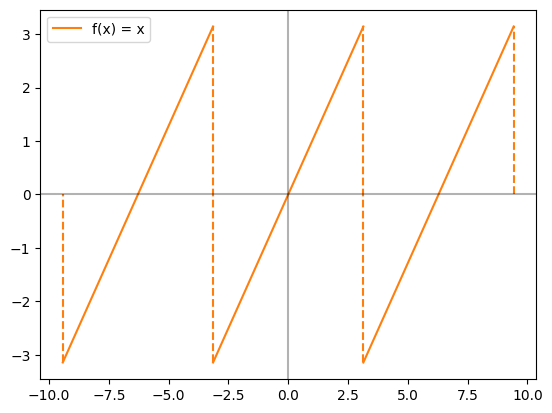

In [42]:
x = np.arange(-np.pi, np.pi, 0.001)
plt.plot(x - 2 * np.pi, x, 'C1')
plt.plot(x + 2 * np.pi, x, 'C1')
plt.vlines(-np.pi, -np.pi, np.pi, color='C1', linestyles='dashed')
plt.vlines(np.pi, -np.pi, np.pi, color='C1', linestyles='dashed')
plt.vlines(3 * np.pi, 0, np.pi, color='C1', linestyles='dashed')
plt.vlines(-3 * np.pi, -np.pi, 0, color='C1', linestyles='dashed')
plt.plot(x, x, 'C1', label='f(x) = x')
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

Now it makes sense to define a Fourier series; since $F$ is periodic in $\mathbb{R}$, we choose to operate in the subset $[-p, p]$, i.e. in $f$ itself:

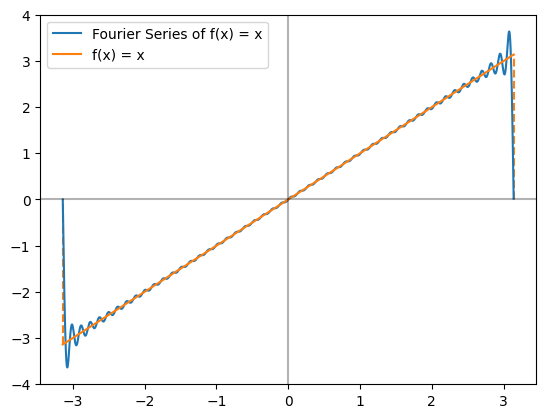

In [43]:
x, y = fourier_series(lambda x: x, (-np.pi, np.pi))
plt.vlines(np.pi, 0, np.pi, color='C1', linestyles='dashed')
plt.vlines(-np.pi, -np.pi, 0, color='C1', linestyles='dashed')
plt.plot(x, y, 'C0', label='Fourier Series of f(x) = x')
plt.plot(x, x, 'C1', label='f(x) = x')
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

We can see that the approximation given by the Fourier series almost perfectly alignes with the actual function in the range $(-\pi, \pi)$. The more it approaches the points of discontinuity $x = -\pi, x = \pi$ though, the error increases.

This behavior is known as the *Gibbs phenomenon*.

Let's see one more example; suppose the function

\begin{align}
f(x) =
\begin{cases}
x^2, &0 < x \leq \pi\\
0, &-\pi < x \leq 0
\end{cases}
\end{align}

in code written as

In [44]:
def f(x: list[float]) -> float:
    return x * x if 0 < x <= np.pi else 0

Extending it into the entirety of $[-\pi, \pi]$ we have
\begin{align}
\tilde{f}(x)=
\begin{cases}
f(x), &x\in(-\pi, \pi]\\
f(\pi), &x=-\pi
\end{cases}=
\begin{cases}
x^2, &x\in(0, \pi] \lor x=-\pi\\
0, &x\in(-\pi, 0]
\end{cases}
\end{align}

and considering the $2\pi$-periodic extension $F$ of $\tilde{f}$ we have

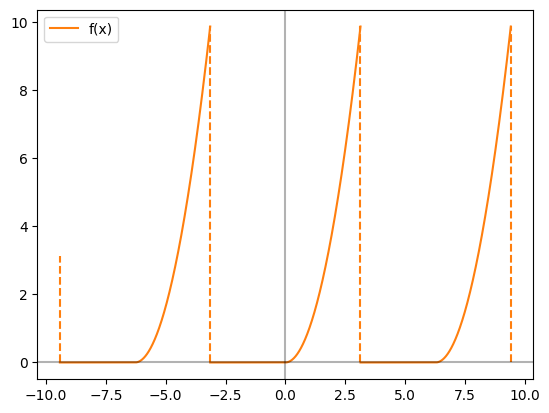

In [45]:
x = np.arange(-np.pi, np.pi, 0.001)
fvals = [f(i) for i in x]
plt.plot(x - 2 * np.pi, fvals, 'C1')
plt.plot(x + 2 * np.pi, fvals, 'C1')
plt.vlines(-np.pi, 0, np.pi * np.pi, color='C1', linestyles='dashed')
plt.vlines(np.pi, 0, np.pi * np.pi, color='C1', linestyles='dashed')
plt.vlines(3 * np.pi, 0, np.pi * np.pi, color='C1', linestyles='dashed')
plt.vlines(-3 * np.pi, 0, np.pi, color='C1', linestyles='dashed')
plt.plot(x, fvals, 'C1', label='f(x)')
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

Again we choose to work in the subset $[-\pi, \pi]$ of the domain of $F$, therefore in $f$, and we have

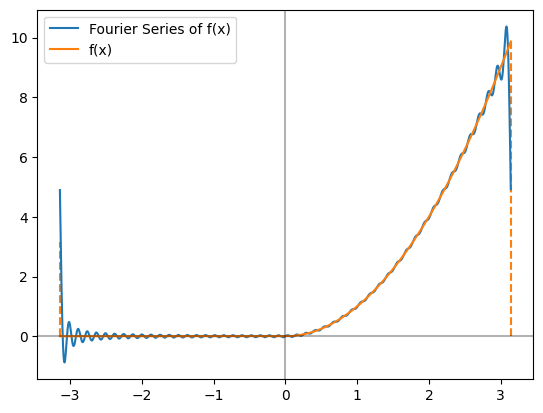

In [47]:
x, y = fourier_series(f, (-np.pi, np.pi))
plt.vlines(-np.pi, 0, np.pi, color='C1', linestyles='dashed')
plt.vlines(np.pi, 0, np.pi * np.pi, color='C1', linestyles='dashed')
plt.plot(x, y, 'C0', label='Fourier Series of f(x)')
plt.plot(x, [f(i) for i in x], 'C1', label='f(x)')
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

where we can again notice the amazing accuracy of the Fourier series' approximation of $f$ in $(-\pi, \pi)$, but the points of discontinuity $x = -\pi, x = \pi$ again form the Gibbs phenomenon.

**<h3>References:</h3>**

* *Applied Mathematics* by N.L.Tsitsas 
* https://docs.scipy.org/doc/scipy/tutorial/integrate.html